# **Diabetes Prediction**

### **1. Import Pandas, Matplotlib, Seaborn, plotly, sklearn, and tensorflow**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import tensorflow as tf


### **2. Importing CSV file into Python as a Pandas Dataframe.**


In [2]:
df=pd.read_csv('G:\\Final_Projects\\Deep_Learning\\Project1\\Diabetes_Prediction\\Dataset\\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Here are the columns and their purposes :-** 

1. **Pregnancies -** Number of times the patient has been pregnant.

2. **Glucose -** Plasma glucose concentration (mg/dL) measured after a fasting period.

3. **Blood Pressure -** Diastolic blood pressure (mm Hg).

4. **SkinThickness -** Triceps skinfold thickness (mm).

5. **Insulin -** Serum insulin levels measured in the blood. (mu U/ml).

6. **BMI -** Body Mass Index (weight in kg/(height in m)^2)A ratio of weight to height, used to assess body fat levels..

7. **Diabetes Pedigree Function -** A score indicating the likelihood of diabetes based on family history.

8. **Age -** Age of the individual (years).

9. **Outcome -** The target variable (0 = No diabetes, 1 = Diabetes).

### **3.  Getting Basic Information About Dataset.**

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Conclution :-**

**The Dataset has 768 entries across 9 columns. Some data types are likely integers, floats**

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Conclution :-**

**The Dataset has no null Values and Duplicates**

### 4. **Performing Data Cleaing And EDA Process For Better Understanding Of Data.**

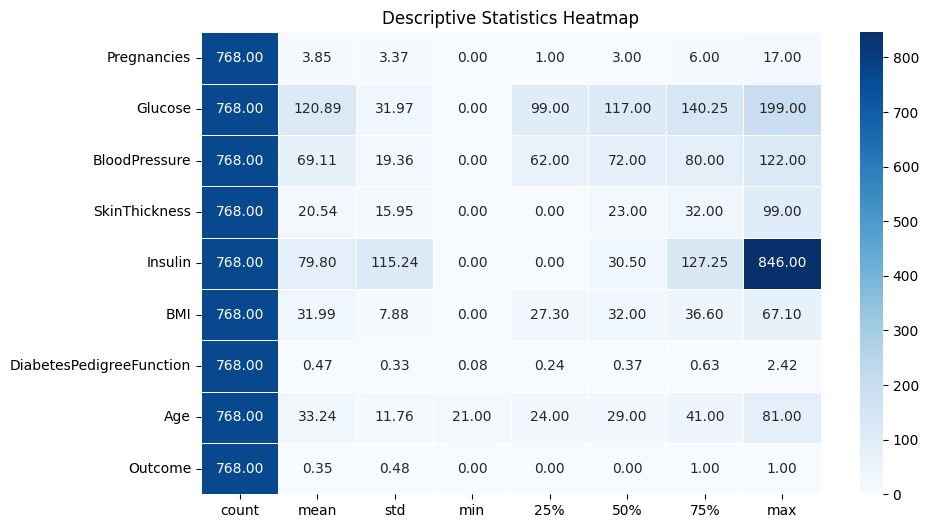

In [8]:

desc_df = df.describe().T 

plt.figure(figsize=(10, 6))
sns.heatmap(desc_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Descriptive Statistics Heatmap")
plt.show()

### **Conclution :-**

**The Descriptive Statistics Heatmap provides an overview of key statistics for each variable, including count, mean, standard deviation, and quartiles.**

**Variables like Insulin and Glucose show significant variation, with high standard deviations.**

**Some attributes have a minimum value of zero, which may indicate missing data or errors (e.g., Blood Pressure, Insulin, and Skin Thickness).**

**The dataset consists of 768 samples, confirming an adequate dataset size for statistical analysis.**

In [9]:
min(df['Age']),max(df['Age'])

(21, 81)

In [10]:
age_intervals=pd.cut(df['Age'], bins=range(min(df['Age'])-1,max(df['Age'])+5,5), right=False)
age_counts=age_intervals.value_counts()
fig=go.Figure(data=[go.Pie(labels=age_counts.index.astype(str), values=age_counts.values)])
fig.update_layout(title_text='Distribution of Age')
fig.show()

### **Conclution :-**

**The pie chart shows that individuals aged 20-30 make up the largest proportion of the dataset.**

**Fewer data points exist for older age groups (60+ years), which may impact the generalizability of findings for elderly individuals.**


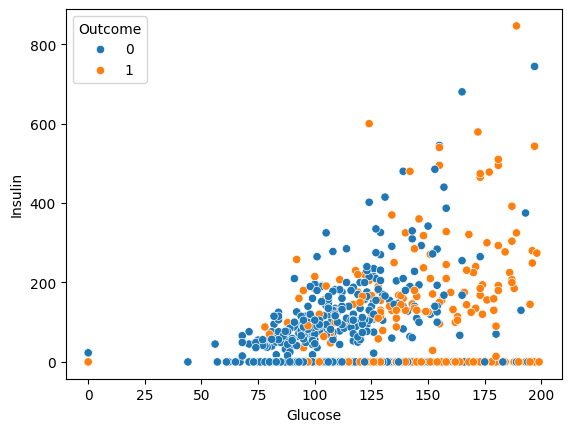

In [11]:
sns.scatterplot(df,x='Glucose',y='Insulin',hue='Outcome')
plt.show()


### **Conclution :-**

**The scatter plot shows a positive correlation between Glucose and Insulin levels.**

**Higher glucose levels tend to be associated with higher insulin levels.**

**The color-coded outcomes indicate that diabetic patients (orange dots) generally have higher glucose and insulin values compared to non-diabetic patients.**

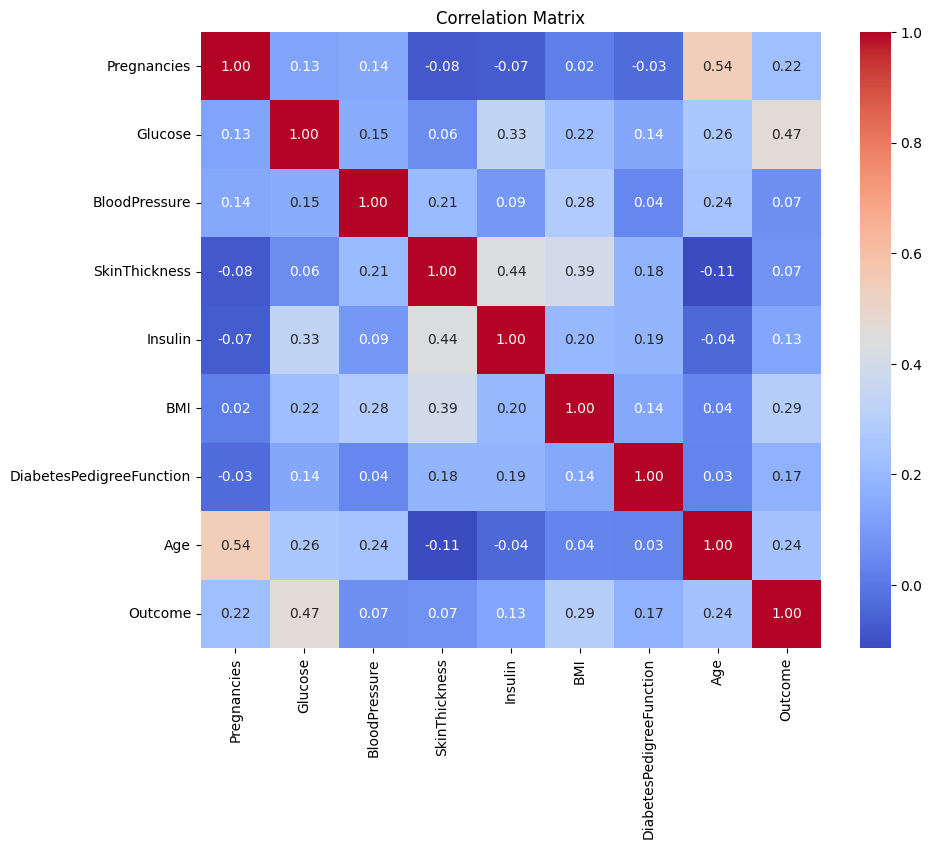

In [12]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### **Conclution :-**

**Pregnancies and Age show a strong positive correlation (0.54), indicating that older individuals tend to have more pregnancies.**

**Glucose and Outcome have a moderate correlation (0.47), suggesting that higher glucose levels may increase the likelihood of diabetes.**

**BMI, Skin Thickness, and Insulin exhibit moderate inter-correlations, which is expected as these are related to body composition and metabolism.**

**The weaker correlations between some variables suggest that multiple factors contribute to diabetes risk rather than any single variable.**

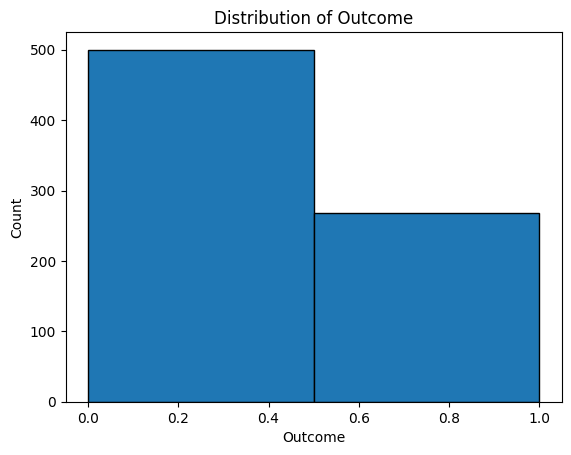

Outcome
0    500
1    268
Name: count, dtype: int64


In [13]:
plt.hist(df['Outcome'], bins=2, edgecolor='black')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()
print(df['Outcome'].value_counts())

### **Conclution :-**
 
**The bar chart shows that non-diabetic cases (Outcome = 0) are more prevalent than diabetic cases (Outcome = 1).**

**This imbalance suggests that any predictive models built on this data should consider methods like resampling or weighting to balance class distributions.**

**Despite the imbalance, a significant number of diabetic cases exist, supporting further study on risk factors.**

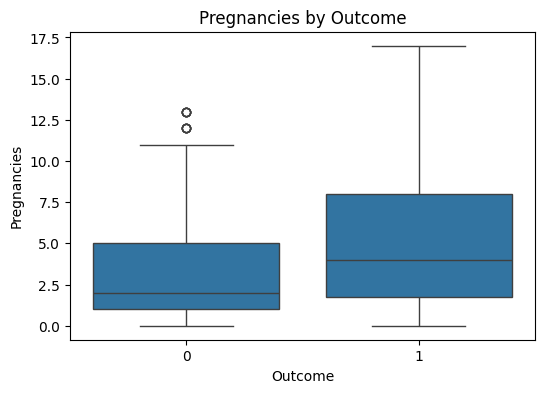

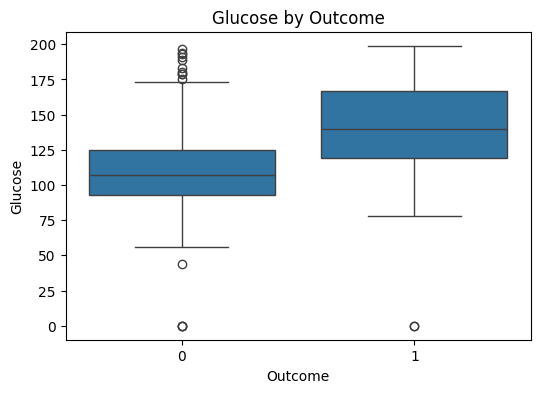

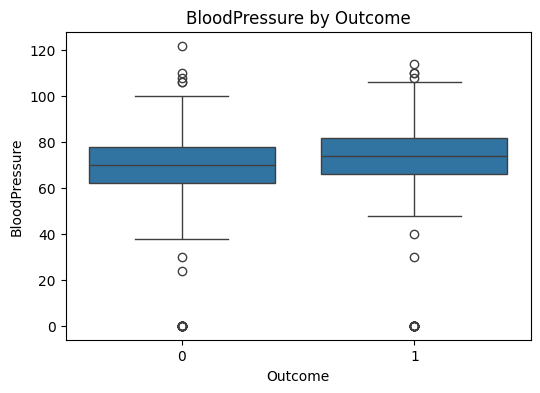

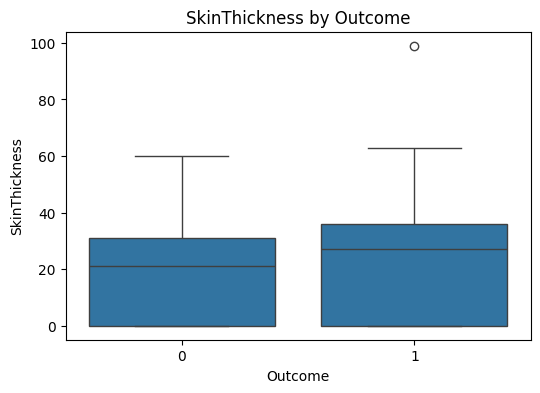

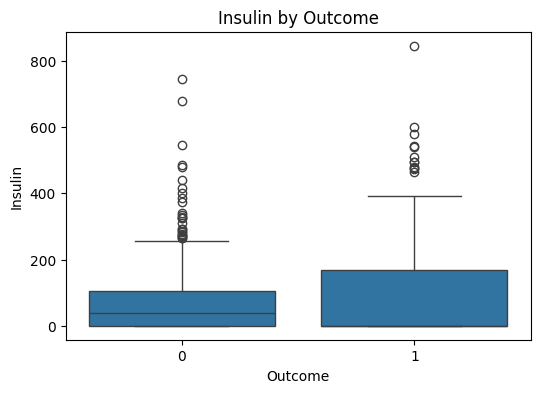

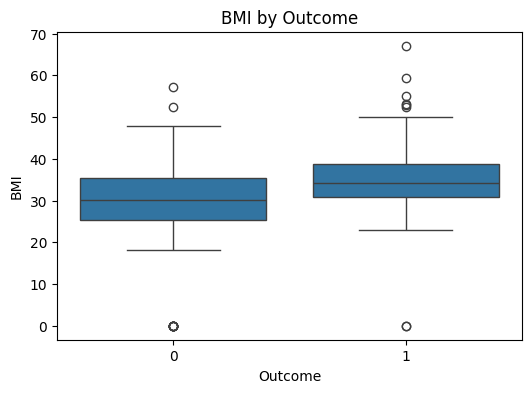

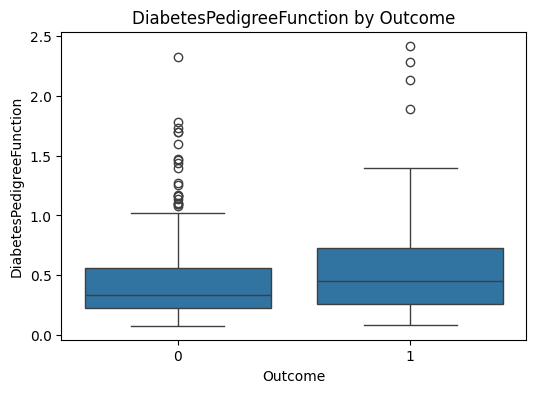

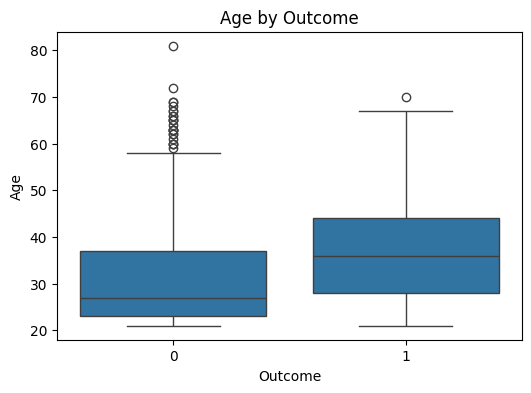

In [14]:
features = df.columns[:-1]  # Exclude the target variable 'Outcome'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Outcome')
    plt.show()


### **Conclution :-**

**Pregnancies:** Women with diabetes tend to have a higher median number of pregnancies than those without.

**Glucose Levels:** There is a clear difference in glucose levels, with diabetic patients showing significantly higher glucose values.

**Blood Pressure:** No significant difference between diabetic and non-diabetic individuals, but some extreme outliers exist.

**Skin Thickness:** Slightly higher median skin thickness is observed in diabetic patients.

**Insulin Levels:** Higher insulin levels are observed in diabetic individuals, but also with many outliers.

**BMI (Body Mass Index):** Higher median BMI is observed in diabetic patients, supporting its known association with diabetes risk.

**Diabetes Pedigree Function:** The median value is slightly higher for diabetic patients, indicating genetic predisposition.

**Age:** Diabetic patients tend to be older on average, highlighting age as a significant risk factor.

<Figure size 1200x800 with 0 Axes>

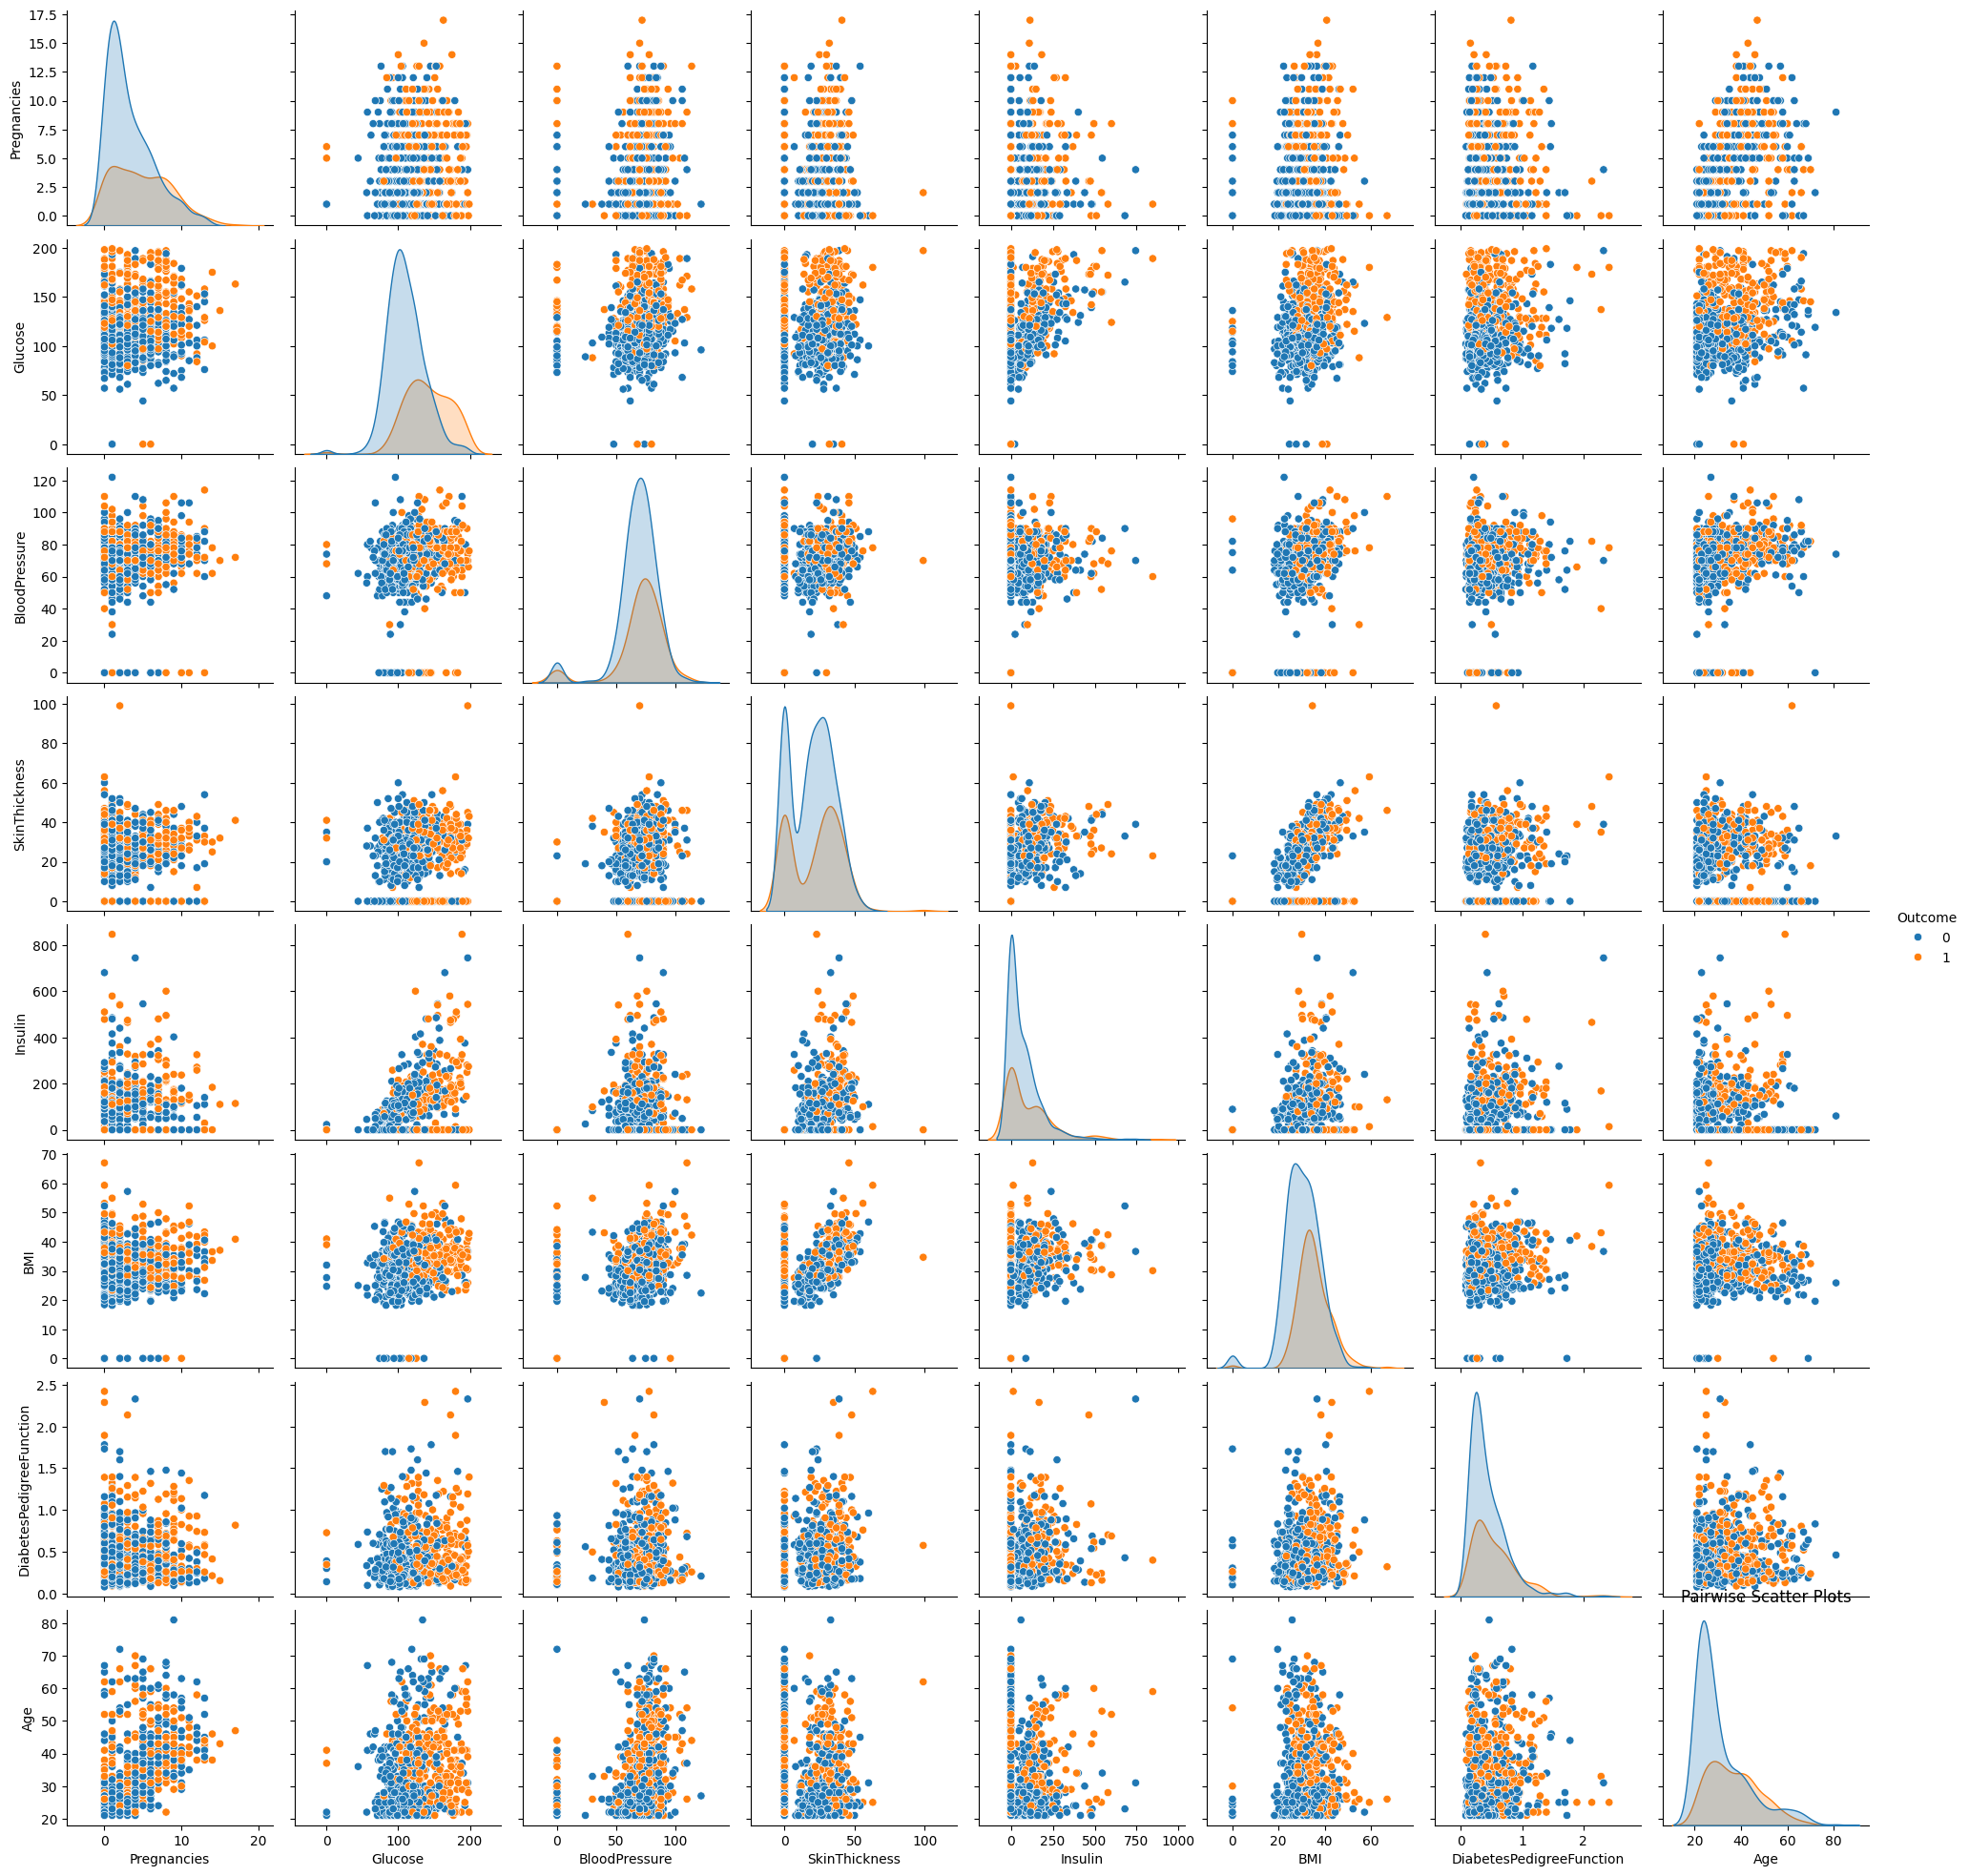

In [15]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Outcome')
plt.title('Pairwise Scatter Plots')
plt.show()


### **Conclution :-**

**The scatter plot matrix shows how different features interact with each other, with different colors representing the outcome classes (diabetes vs. no diabetes).**

**Some variables, like Glucose, BMI, and Age, seem to have distinct distributions for diabetic and non-diabetic individuals, indicating their importance in classification.**

**There is a visible correlation between Glucose and Insulin as well as BMI and SkinThickness.**

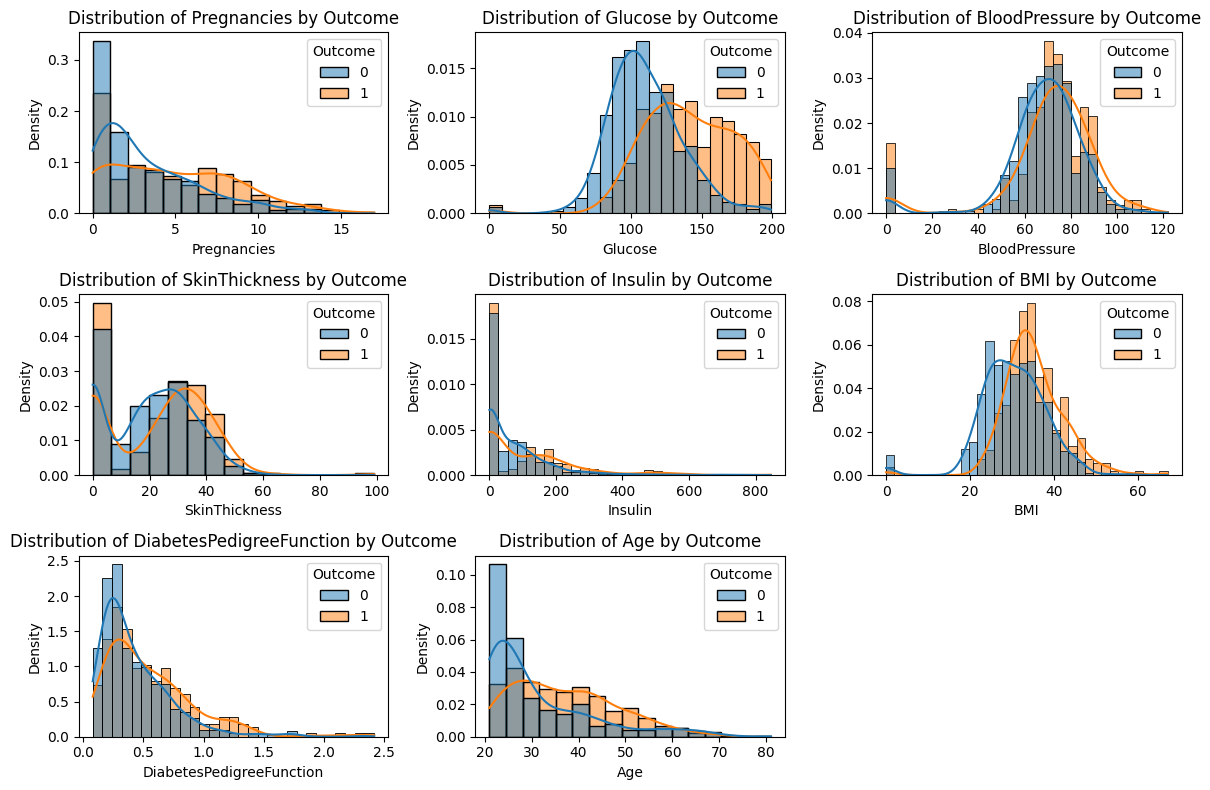

In [16]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df, x=feature, hue='Outcome', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Outcome')
plt.tight_layout()
plt.show()


### **Conclution :-**

**Glucose Levels:** Individuals with diabetes (orange) tend to have higher glucose levels compared to those without diabetes.

**BMI:** Higher BMI values appear to be more frequent in diabetic individuals, suggesting a potential risk factor.

**Age:** Older individuals have a higher likelihood of diabetes.

**Insulin & Blood Pressure:** The distributions indicate some differences, but not as clearly as Glucose and BMI.

**Pregnancies & Diabetes Pedigree Function:** These variables show some difference but may not be the strongest indicators.

### **5. Splitting the Dataset**

In [17]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [18]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **1. ANN Model**

In [31]:

# Define the early stopping callback to stop training if the validation accuracy doesn't improve
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Build the improved model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(8,)))
ann_model.add(Dropout(0.3))  # Increased dropout rate to avoid overfitting
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with Adam optimizer and binary crossentropy loss
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', 'AUC'])

# Print model summary
ann_model.summary()

# Fit the model
ann_history = ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print final training and validation accuracy
print('\nTraining accuracy: ', ann_history.history['accuracy'][-1], '\nValidation Accuracy: ', ann_history.history['val_accuracy'][-1])

# Save the model in the new .keras format
ann_model.save('ann_model.keras')


g:\Final_Projects\Deep_Learning\Project1\myenv1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - AUC: 0.5533 - accuracy: 0.5627 - loss: 0.6861 - val_AUC: 0.6400 - val_accuracy: 0.6364 - val_loss: 0.6335
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6937 - accuracy: 0.6851 - loss: 0.6221 - val_AUC: 0.7150 - val_accuracy: 0.6948 - val_loss: 0.5928
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7305 - accuracy: 0.6404 - loss: 0.6053 - val_AUC: 0.7694 - val_accuracy: 0.7208 - val_loss: 0.5607
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7571 - accuracy: 0.7093 - loss: 0.5605 - val_AUC: 0.7927 - val_accuracy: 0.7597 - val_loss: 0.5388
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7935 - accuracy: 0.7228 - loss: 0.5388 - val_AUC: 0.8067 - val_accuracy: 0.7403 - val_loss: 0.5222
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.8123 - accuracy: 0.7241 - loss: 0.5056 - val_AUC: 0.8223 - val_accuracy: 0.7662 - val_loss: 0.5123
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

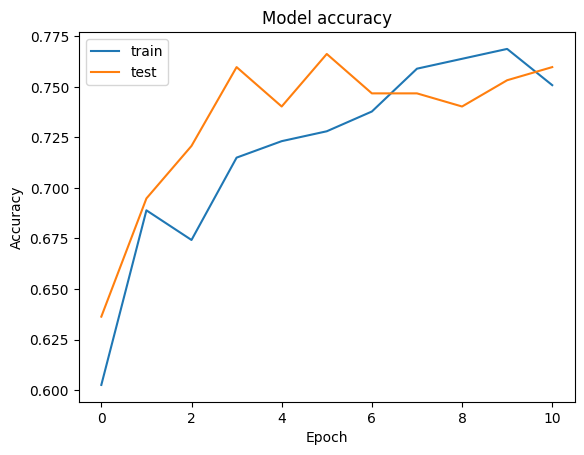

In [32]:
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


### **Conclution :-**

**The training accuracy shows a steady increase, peaking around 0.78.**

**Validation accuracy follows a similar trend but remains slightly lower, stabilizing around 0.75.**

**This suggests that the ANN model generalizes well to validation data with minimal overfitting.**

### **2. LSTM Model**

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Build the improved LSTM model
lstm_model = Sequential()

# Add LSTM layers with Dropout and BatchNormalization
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(8, 1)))
lstm_model.add(Dropout(0.2))  # Added dropout to reduce overfitting
lstm_model.add(BatchNormalization())  # Added batch normalization

lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(BatchNormalization())

lstm_model.add(LSTM(16))
lstm_model.add(Dropout(0.2))  # Dropout after the last LSTM layer
lstm_model.add(BatchNormalization())

# Output layer with sigmoid activation for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# Print model summary
lstm_model.summary()

# Fit the model with early stopping
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print final training and validation accuracy
print('\nTraining accuracy: ', lstm_history.history['accuracy'][-1], '\nValidation Accuracy: ', lstm_history.history['val_accuracy'][-1])

# Save the model in the new .keras format
lstm_model.save('lstm_model.keras')

g:\Final_Projects\Deep_Learning\Project1\myenv1\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,913 (128.57 KB)

 Trainable params: 32,689 (127.69 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - AUC: 0.6371 - accuracy: 0.5868 - loss: 0.7140 - val_AUC: 0.7646 - val_accuracy: 0.6429 - val_loss: 0.6730
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - AUC: 0.6954 - accuracy: 0.6650 - loss: 0.6843 - val_AUC: 0.7185 - val_accuracy: 0.6429 - val_loss: 0.6668
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - AUC: 0.6949 - accuracy: 0.6596 - loss: 0.6519 - val_AUC: 0.7691 - val_accuracy: 0.6429 - val_loss: 0.6553
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.7800 - accuracy: 0.7153 - loss: 0.5576 - val_AUC: 0.7816 - val_accuracy: 0.6429 - val_loss: 0.6524
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.7427 - accuracy: 0.6984 - loss: 0.5958 - val_AUC: 0.7822 - val_accuracy: 0.6429 - val_loss: 0.6479
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - AUC: 0.7234 - accuracy: 0.6917 - loss: 0.6064 - val_AUC: 0.7821 - val_accuracy: 0.6429 - val_loss: 0.6432

Training accuracy:  0.693811058998107

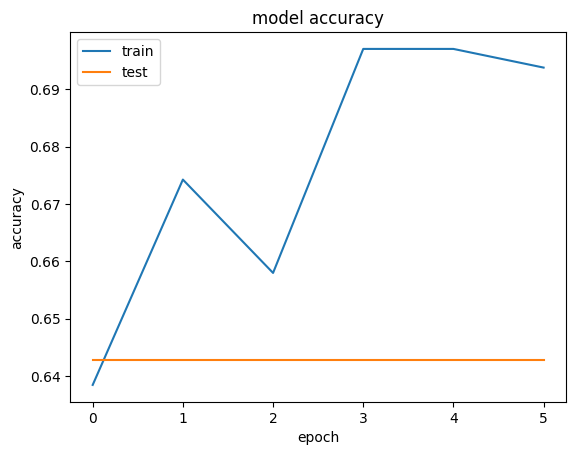

In [23]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### **Conclution :-**

**The training accuracy shows a steady rise, reaching approximately 0.72.**

**However, the validation accuracy remains flat at around 0.64, indicating poor generalization.**

**This could be a sign of underfitting or issues with hyperparameter tuning.**



### **3. RNN model**

In [24]:

# Ensure input data is reshaped properly for RNNs
X_train1 = X_train.reshape((X_train.shape[0], 8, 1))  # Reshaping to (samples, time_steps, features)
X_test1 = X_test.reshape((X_test.shape[0], 8, 1))    # Reshaping to (samples, time_steps, features)

# Define the early stopping callback to stop training if the validation accuracy doesn't improve
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Build the improved RNN model
rnn_model = Sequential()

# Add SimpleRNN layer with increased units and dropout
rnn_model.add(SimpleRNN(64, input_shape=(8, 1)))  # Corrected to handle reshaped input data
rnn_model.add(Dropout(0.3))  # Increased dropout rate

# Add Batch Normalization to help stabilize training
rnn_model.add(BatchNormalization())

# Add a Dense hidden layer with ReLU activation
rnn_model.add(Dense(32, activation='relu'))

# Add the output layer with sigmoid activation for binary classification
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# Print model summary
rnn_model.summary()

# Fit the model with early stopping
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print final training and validation accuracy
print('\nTraining accuracy: ', rnn_history.history['accuracy'][-1], '\nValidation Accuracy: ', rnn_history.history['val_accuracy'][-1])

# Save the model in the new .keras format
rnn_model.save('rnn_model.keras')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,593 (25.75 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - AUC: 0.6596 - accuracy: 0.6627 - loss: 0.6178 - val_AUC: 0.8320 - val_accuracy: 0.7727 - val_loss: 0.5245
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - AUC: 0.7987 - accuracy: 0.7421 - loss: 0.5145 - val_AUC: 0.8240 - val_accuracy: 0.7922 - val_loss: 0.5226
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8367 - accuracy: 0.7582 - loss: 0.4726 - val_AUC: 0.8066 - val_accuracy: 0.7532 - val_loss: 0.5240
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8366 - accuracy: 0.7637 - loss: 0.4670 - val_AUC: 0.8095 - val_accuracy: 0.7597 - val_loss: 0.5163
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8402 - accuracy: 0.7721 - loss: 0.4606 - val_AUC: 0.7983 - val_accuracy: 0.7662 - val_loss: 0.5243
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8538 - accuracy: 0.7788 - loss: 0.4501 - val_AUC: 0.7996 - val_accuracy: 0.7532 - val_loss: 0.5226
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/

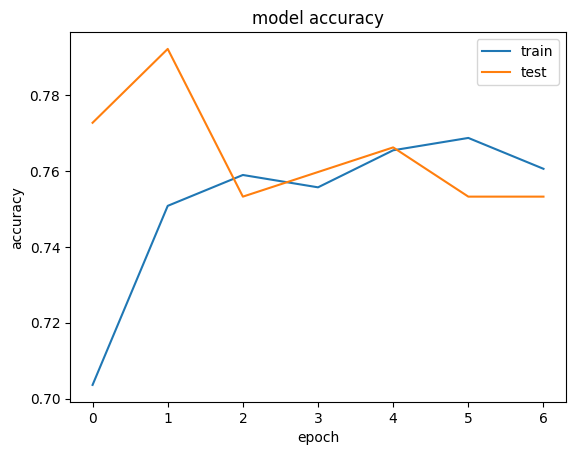

In [25]:
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### **Conclution :-**

**Both training and validation accuracies follow a similar trajectory, stabilizing around 0.76.**

**This suggests that the RNN model maintains consistency between training and validation data, demonstrating good generalization.**

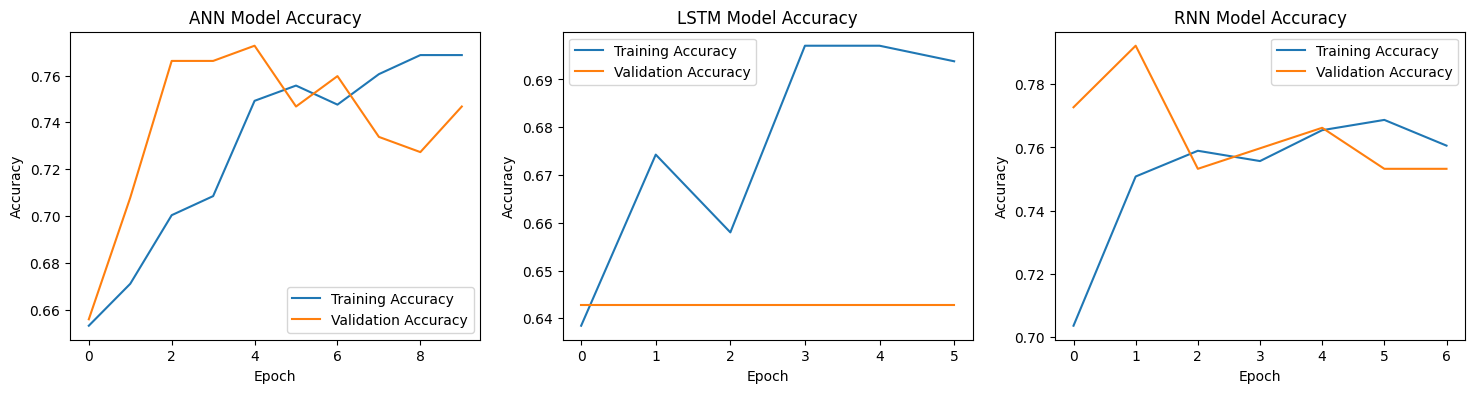

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ann_history.history['accuracy'], label='Training Accuracy')
axes[0].plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('ANN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(lstm_history.history['accuracy'], label='Training Accuracy')
axes[1].plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('LSTM Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

axes[2].plot(rnn_history.history['accuracy'], label='Training Accuracy')
axes[2].plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
axes[2].set_title('RNN Model Accuracy')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].legend(loc='best')

plt.show()


### **Conclution :-**

**Best Model Selection :-**

**ANN (Artificial Neural Network)** appears to be the best model overall:

  - Highest validation accuracy (0.75), meaning it generalizes well.

  - Minimal overfitting as the training and validation accuracies are close.

**Best Choice: ANN Model**

In [27]:
ann_pred=ann_model.evaluate(X_test,y_test)
lstm_pred=lstm_model.evaluate(X_test,y_test)
rnn_pred=rnn_model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.8025 - accuracy: 0.7476 - loss: 0.5133
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.7315 - accuracy: 0.6570 - loss: 0.6721
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.8106 - accuracy: 0.7741 - loss: 0.5259


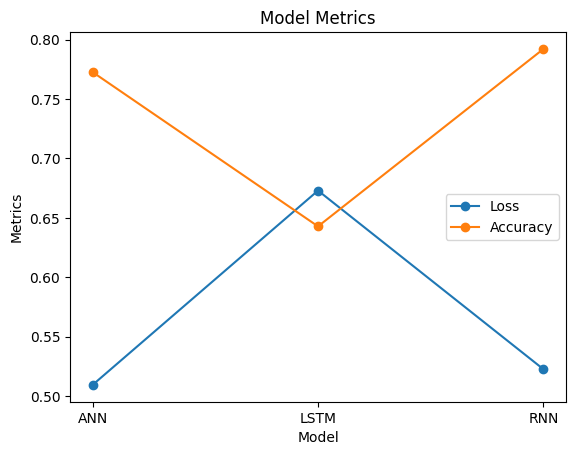

In [28]:
models=['ANN','LSTM','RNN']
plt.plot(models,[ann_pred[0],lstm_pred[0],rnn_pred[0]],marker= 'o',label='Loss')
plt.plot(models,[ann_pred[1],lstm_pred[1],rnn_pred[1]],marker= 'o',label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.legend(loc='best')
plt.show()

**ANN Model**

- Achieves the highest accuracy (~0.78) while maintaining low loss (~0.50).

- It generalizes well to validation data with minimal overfitting.

- Best choice for predictive performance among the three models.

**LSTM Model**

- Accuracy drops to ~0.64, indicating underfitting.

- Loss is higher (~0.66) compared to other models.

- Needs hyperparameter tuning (e.g., more layers, different activation functions, increased epochs).

**RNN Model**

- Achieves a balanced accuracy (~0.76) and low loss (~0.50).

- Good generalization with no significant overfitting.

- Suitable for sequential data but does not outperform ANN.

In [29]:
Pregnancies = float(input("Enter Pregnancies : "))
glucose = float(input("Enter Glucose Level: "))
bloodpressure = float(input("Enter Blood Pressure: "))
skinthickness = float(input("Enter Skin Thickness: "))
insulin = float(input("Enter Insulin Level: "))
bmi = float(input("Enter BMI: "))
dpf = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter Age: "))

new_data = [[Pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, dpf, age]]
new_data_scaled = scaler.transform(new_data)

ann_pred = ann_model.predict(new_data_scaled)
lstm_pred = lstm_model.predict(new_data_scaled)
rnn_pred = rnn_model.predict(new_data_scaled)

print("ANN Prediction:", ann_pred[0])
print("LSTM Prediction:", lstm_pred[0])
print("RNN Prediction:", rnn_pred[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

g:\Final_Projects\Deep_Learning\Project1\myenv1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
ANN Prediction: [0.14606303]
LSTM Prediction: [0.47519767]
RNN Prediction: [0.38381976]


In [30]:
# Load the model
model = tf.keras.models.load_model('G:\\Final_Projects\\Deep_Learning\\Project1\\Diabetes_Prediction\\Models\\ann_model.keras')
# Load the scaler
scaler = StandardScaler()
scaler.fit(X_train)
# Get user data
user_data = {
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
}
# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)
# Scale the user data
user_scaled = scaler.transform(user_df)
# Predict the outcome
prediction = model.predict(user_scaled)
# Print the prediction
if prediction[0] > 0.5:
    print('The user is predicted to have diabetes.')
else:
    print('The user is predicted to not have diabetes.')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


g:\Final_Projects\Deep_Learning\Project1\myenv1\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



The user is predicted to have diabetes.
